# Titanic Project

### Problem Statement: 

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.  

In [1]:
# Importing the necessary Libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Observations: The dataset contains 12 columns and 891 rows. Both numerical and categorical values are present. Survived column is the 'Label' and rest are the features.

Categorical features: In the dataset Survived, Sex and Embarked have categorical data also Pclass has the ordinal data.

Numerical features: Here Age and Fare are continuous data, SibSp and Parch are discrete data.

## Exploratory Data Analysis 

In [3]:
df.shape

(891, 12)

The dataset contains 891 rows and 12 columns in which 11 are features and the label is Survival.

In [4]:
# Checking the types of the dataset.

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In this dataset we have three types of data i.e. integer, Float and Object.

In [5]:
# Checking for Null values in the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In the dataset we have the breif information which includes Column names, No Null values and type of data and memory usage. 

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we can see their is 177 null values in the Age Column and 687 Null values in the Cabin.

<AxesSubplot:>

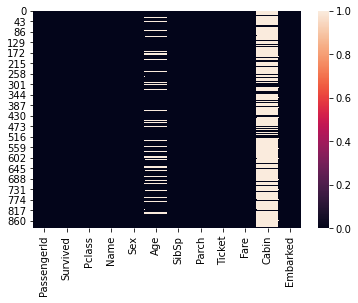

In [7]:
sns.heatmap(df.isnull())

Here we can clearly see the columns with white line containing null values.

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# Checking the uniqueness of the Target Column.

df['Survived'].unique()

array([0, 1], dtype=int64)

In the Target Column we can see that their are two unique values i.e 0 and 1. In which 0 is for No and 1 is for Yes.
Both the values are of Integer datatype.

In [10]:
# Checking the count of the unique values.

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In the two classes of the label we can see that there are 546 Passengers who did not survived and 342 Passengers who have survived. This also shows that the data is not balanced.

## Statical Analysis  

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observation: The statical analysis is showing the data of the columns having only numerical values.

We can see in the above dataset that their are Outliers present in the dataset and also the data is imbalanced.

## Data Visualization 

<AxesSubplot:xlabel='Survived', ylabel='count'>

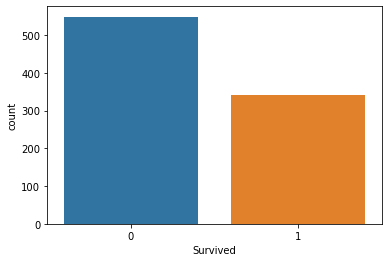

In [12]:
# Visualizing the Survival label in coulmns.

sns.countplot(df['Survived'])

Observation: 1 is showing about the people who survived. So, it shows that the Data is imbalanced. Since it is out target variable so we need to treat this class imbalancing issue using oversampling and downsampling.

3    491
1    216
2    184
Name: Pclass, dtype: int64


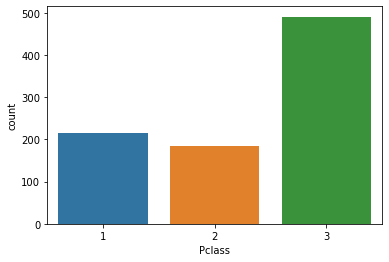

In [13]:
# Checking the survival rate in the Passenger class.

sns.countplot(df['Pclass'])
print(df['Pclass'].value_counts())

It is observed in the comparison that Class 3 Passengers are the maximum ones who didnt survived in comparison to Class 1 and 2.

male      577
female    314
Name: Sex, dtype: int64


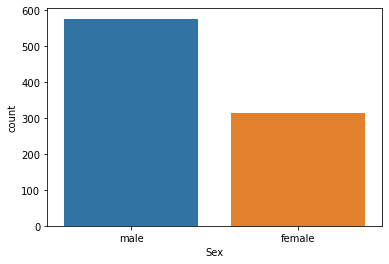

In [14]:
# Checking the count for Sex feature.

sns.countplot(df['Sex'])
print(df['Sex'].value_counts())

So we can see that the count of male is 577 and female is 314. So it is clear that the survival of female is more than that of male.

S    644
C    168
Q     77
Name: Embarked, dtype: int64


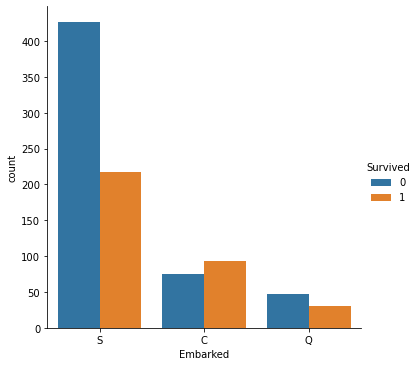

In [15]:
# Checking the counts of embarked

sns.factorplot('Embarked', kind='count', data=df, hue='Survived')
print(df['Embarked'].value_counts())

These are the places where the passengers are boarded from. From the plot we can see that majority of passengers boarded from "S" and "Q" has less passengers.

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


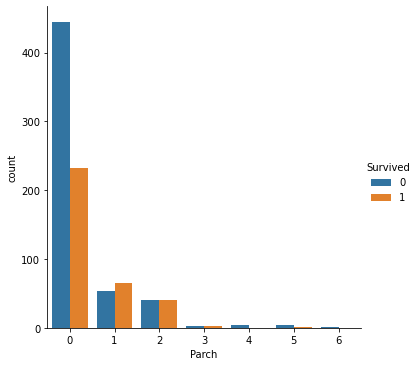

In [16]:
#Checking the count in the Parched

sns.factorplot('Parch',kind='count',data=df,hue='Survived')
print(df['Parch'].value_counts())

From this plot we can see most of the passengers are travelled alone which is named as 0 in the plot. We can say almost 80% of the passengers are alone, 15% of the passengers are travelled either with their children or parents and remaining 5% of them are travelled with group.

##  Distribution of Skewness

<AxesSubplot:xlabel='Age', ylabel='Density'>

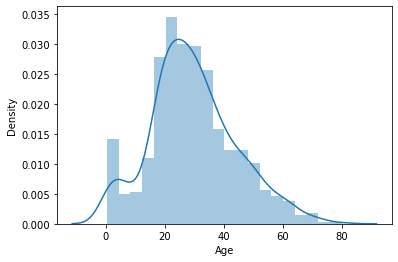

In [17]:
sns.distplot(df['Age'])

Data is normal and their is no skewness.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

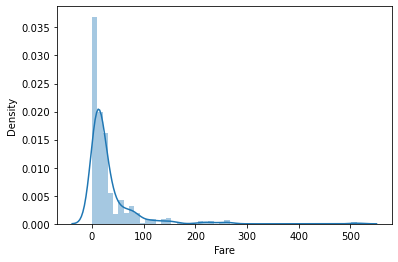

In [18]:
sns.distplot(df['Fare'])

Data is not normal and it has skewness.

## Bivariate Analysis 

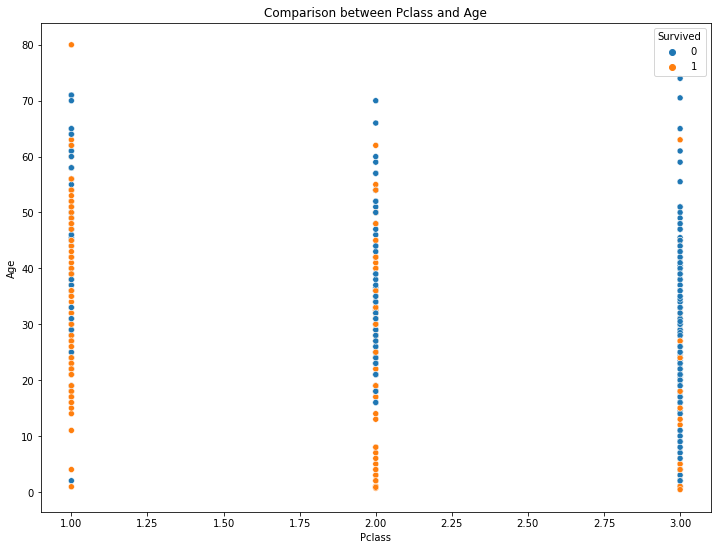

In [19]:
plt.figure(figsize=(12,9))
plt.title("Comparison between Pclass and Age")
sns.scatterplot(df['Pclass'],df['Age'],hue=df['Survived']);

This is the comparison between Pclass and Age on the basis of target variable. In this as we can see orage dot denotes the people who survived and blue dot denotes the people who didnot survived.As we can see in the plot, In the upper class people from age 5 to 30 and 38 to 55 have survived and only few died. But in Class 2 we can see most of the people between the age of 16 to 55 have died. And in the Class 3 most people have not survived.

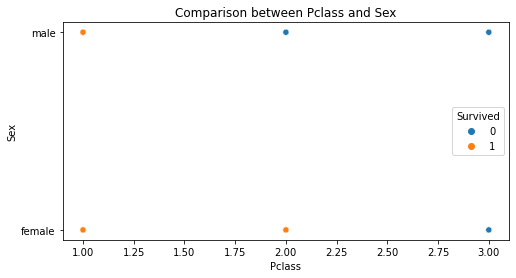

In [20]:
plt.figure(figsize=(8,4))
plt.title("Comparison between Pclass and Sex")
sns.scatterplot(df['Pclass'],df['Sex'],hue=df["Survived"]);

This plot is the comparison between the Pclass and Sex. As we can see both male and female have survived in 1st Class. In 2nd Class only Female survived and male didnot. In 3rd Class both male and female didnot survived.

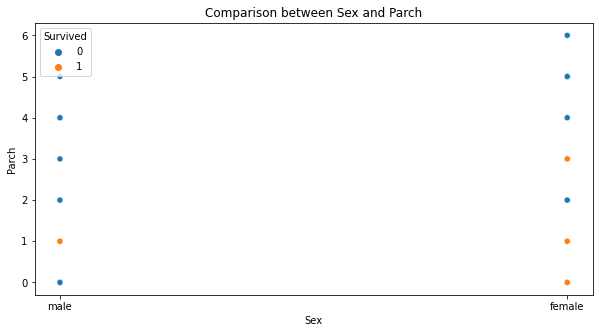

In [21]:
plt.figure(figsize=(10,5))
plt.title("Comparison between Sex and Parch")
sns.scatterplot(df['Sex'],df['Parch'],hue=df["Survived"]);

The above plot gives the comparision between the features Sex and Parch on the basis of label Survived. Most of the passengers have the relation to each other. There are only few passengers survived both male and female.

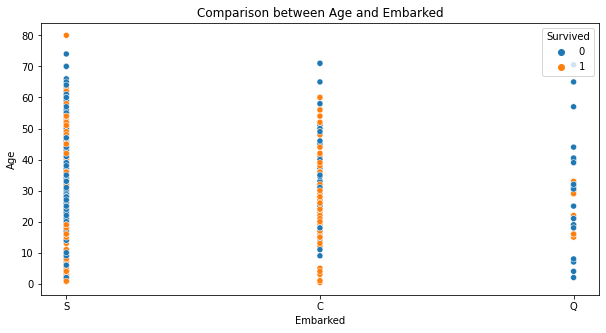

In [22]:
plt.figure(figsize=(10,5))
plt.title("Comparison between Age and Embarked")
sns.scatterplot(df['Embarked'],df['Age'],hue=df["Survived"]);

The passengers who embarked for Southampton(S) (age between 20 to 40) are dead. Most of the passengers who embarked for Cherbourg(C) were survived compared to S and Q. And only few passengers survived who embarked for Queenstown(Q).

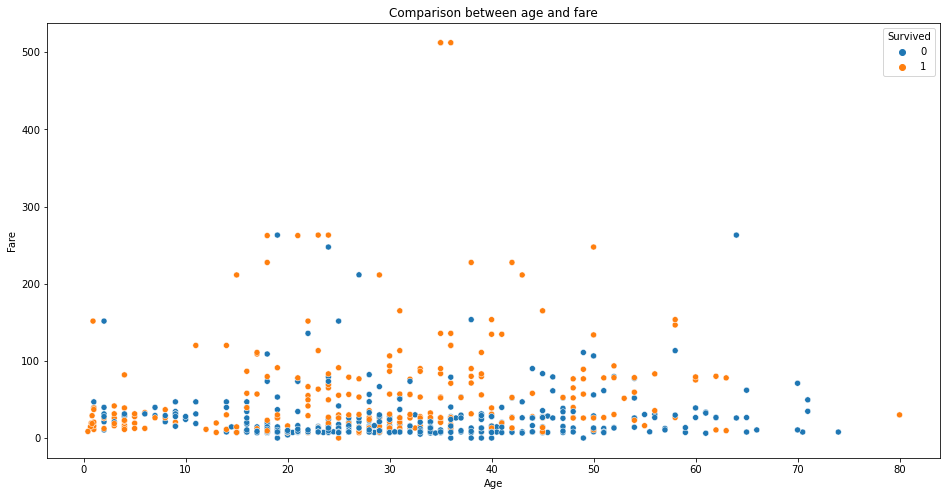

In [23]:
plt.figure(figsize=(16,8))
plt.title("Comparison between age and fare")
sns.scatterplot(df['Age'],df['Fare'],hue=df["Survived"]);

This gives the comparision between the Age and Fare on the basis of label Survived. Here the children(0-8 yrs) who paid less Fare have the high survival chance but for the passengers whose age is between 20 to 50 and paid more Fare their survival chance being increase. So it can be concluded that if a passenger paid a higher fare then the survival rate is more.

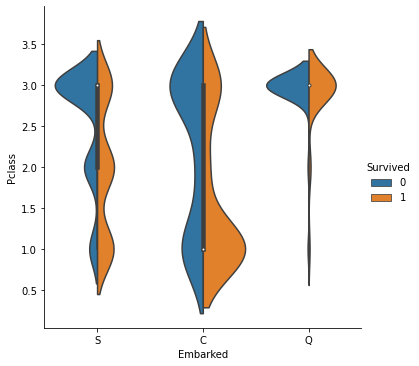

In [24]:
sns.catplot(x='Embarked',y='Pclass',hue='Survived',kind='violin',data=df,split=True);

From this violin graph we can see the majority of passengers boarded from S and it looks good that the survival rate is high than compared to Q and C. The survival rate is high for 1st class passengers boarded from C and it is decreased for 2nd class. And the passengers in 3rd class who embarked from Q have less survival rate

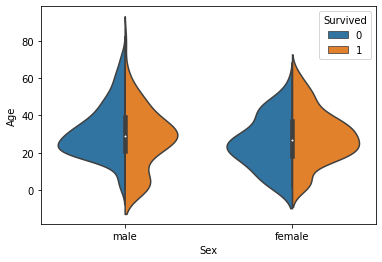

In [25]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,split=True);

This gives the age summary of men, women and the children who were saved from the disaster. Here we can see the survival rate of children is good and it is high for the women in the age range 20-50 and less for men as the age increases.

## Multi-Variate Analysis

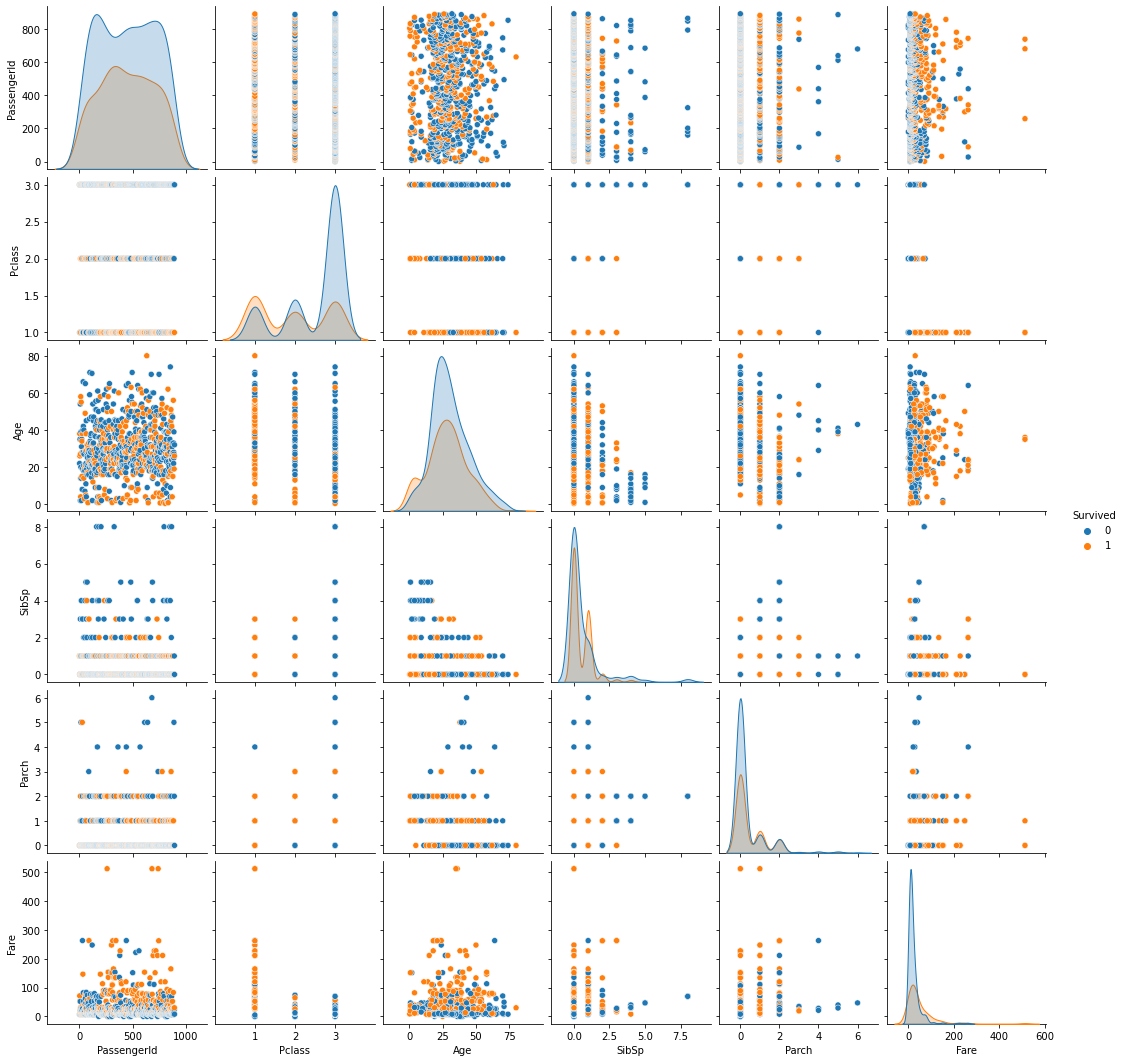

In [26]:
sns.pairplot(df,hue='Survived');

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'Survived'.

From this pairplot we can observe that the correlation exists between two variables and on the diagonal we can see distribution plotting. We can see the features Age and PassengerId are highly correlated but PassengerId has no more importance in our dataset so I am going to ignore it.

## Correlation between the target variable and independent variables using Heat map

In [27]:
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'PassengerId'),
  Text(0, 1.5, 'Survived'),
  Text(0, 2.5, 'Pclass'),
  Text(0, 3.5, 'Age'),
  Text(0, 4.5, 'SibSp'),
  Text(0, 5.5, 'Parch'),
  Text(0, 6.5, 'Fare')])

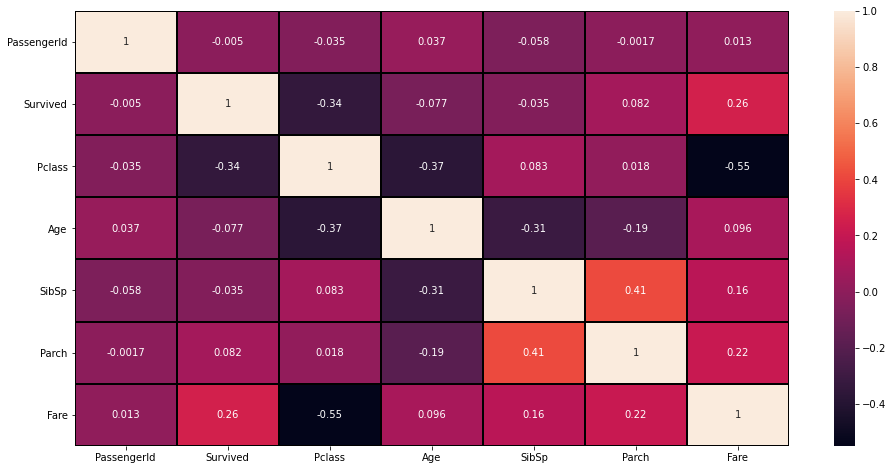

In [28]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),linewidth=1,linecolor='black',annot=True)
plt.yticks(rotation=0)

This heat map contains both positive and negative correlation.

We can observe that the feature column Parch and Fare are positively correlated with the target variable "Survived". Pclass is highly negatively correlated with the target variable "Survived". Also the columns SibSp, Age and PassengerId are negatively correlated with the label. The feature columns SibSp and Parch are positively correlated with each other. Light shades are highly correlated. Dark shades are less correlated. Also there are some independent variables which shows highly negative correlation between each other. So we can check the multicollinearity problem using VIF if necessary.

In [29]:
corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

## Visualizing the correlation between label and features using bar plot 

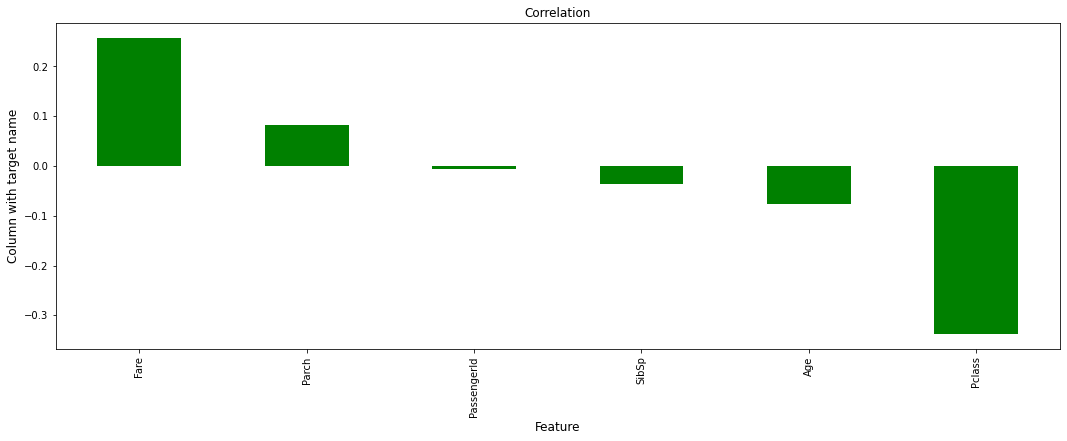

In [30]:
plt.figure(figsize=(18,6))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='green')
plt.xlabel('Feature',fontsize=12)
plt.ylabel('Column with target name',fontsize=12)
plt.title("Correlation",fontsize=12)
plt.show()

Here we can easily observe the correlation.

From the heat map we can also observe that the PassengerId column has no relation with the target variable, so we can drop that column.

### Dropping irrelevant column 

In [31]:
# Dropping PassengerID and Name column

df.drop('PassengerId',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### Identifying the Outliers

<AxesSubplot:xlabel='Age'>

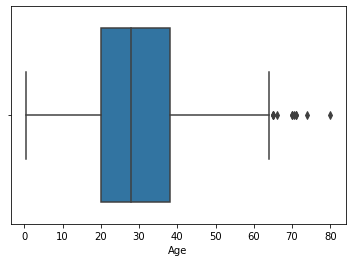

In [33]:
sns.boxplot(df['Age'])

Outliers are present.

<AxesSubplot:xlabel='Fare'>

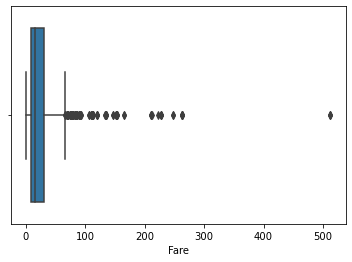

In [34]:
sns.boxplot(df['Fare'])

Outliers are present.

<AxesSubplot:xlabel='SibSp'>

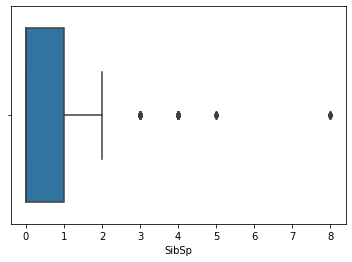

In [35]:
sns.boxplot(df['SibSp'])

Their are Outliers present but their are only few outliers.

<AxesSubplot:xlabel='Parch'>

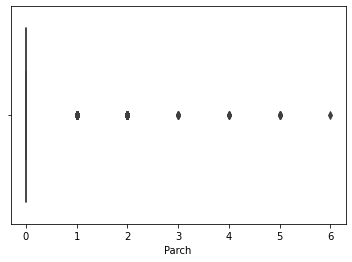

In [36]:
sns.boxplot(df['Parch'])

Outliers present

### Data cleaning 

In [37]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [38]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna('U')
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

All the Null values has been treated.

<AxesSubplot:>

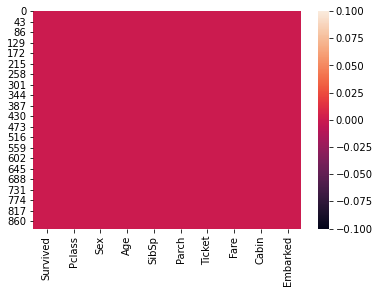

In [39]:
sns.heatmap(df.isnull())

### Removing Outliers

In [40]:
import os
import scipy as stats
from scipy.stats import zscore

In [41]:
# Removing Outliers using Zscore method.

variables = df[['Age','Fare']]
z = np.abs(zscore(variables))
z

array([[0.56573646, 0.50244517],
       [0.66386103, 0.78684529],
       [0.25833709, 0.48885426],
       ...,
       [0.1046374 , 0.17626324],
       [0.25833709, 0.04438104],
       [0.20276197, 0.49237783]])

In [42]:
new_df = df[(z<3).all(axis=1)]
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,U,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,U,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,U,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [43]:
new_df.shape

(864, 10)

In [44]:
# Checking skewness

new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       3.751753
Parch       2.840412
Fare        2.257178
dtype: float64

We can observe the features Pclass, SibSp, Parch and Fare has skewness. Since Pclass is categorical column so we should not remove skewness. Let's remove skewness in Age, SibSp, Parch and Fare which contains numerical data.

### Removing Skewness using yeo-johnson method 

In [45]:
from sklearn.preprocessing import PowerTransformer

sf = ['Fare','SibSp','Parch']
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters = 'box-cox' or 'yeo-johnson'
'''
new_df[sf] = scaler.fit_transform(new_df[sf].values)
new_df[sf]

,Fare,SibSp,Parch
0,-0.882769,1.374574,-0.548637
1,1.529038,1.374574,-0.548637
2,-0.792444,-0.680931,-0.548637
3,1.216581,1.374574,-0.548637
4,-0.776493,-0.680931,-0.548637
...,...,...,...
886,-0.279691,-0.680931,-0.548637
887,0.607981,-0.680931,-0.548637
888,0.345275,1.374574,1.879004
889,0.607981,-0.680931,-0.548637


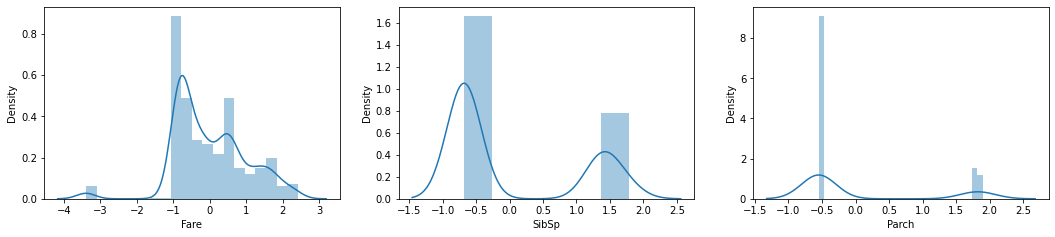

In [46]:
# After removing lets check how the data has been distributed in each column.

plt.figure(figsize=(18,12), facecolor='white')
plotnumber = 1

for column in df[sf]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()  

The data is not normal but the skewness has got removed compared to the old data.

In [47]:
# Now lets check the skewness

new_df.skew().sort_values()

Pclass     -0.708375
Fare       -0.009095
Age         0.321096
Survived    0.502011
SibSp       0.805038
Parch       1.277888
dtype: float64

### Encoding the data using Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [49]:
cols = ["Sex", "Ticket", "Cabin", "Embarked"]
new_df[cols]= new_df[cols].apply(LE.fit_transform)
new_df[cols].head()

,Sex,Ticket,Cabin,Embarked
0,1,517,135,2
1,0,587,70,0
2,0,655,135,2
3,0,48,48,2
4,1,466,135,2


Object type data has been converted to numerical data

### Preprocessing the Data

#### Separating the independent and target variables into x and y

In [50]:
x = new_df.drop("Survived", axis=1)
y = new_df["Survived"]

In [51]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1.374574,-0.548637,517,-0.882769,135,2
1,1,0,38.0,1.374574,-0.548637,587,1.529038,70,0
2,3,0,26.0,-0.680931,-0.548637,655,-0.792444,135,2
3,1,0,35.0,1.374574,-0.548637,48,1.216581,48,2
4,3,1,35.0,-0.680931,-0.548637,466,-0.776493,135,2


In [52]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

### Oversampling 

In [53]:
# Balancing the data using Oversampling.

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [54]:
y.value_counts()

0    537
1    537
Name: Survived, dtype: int64

we can see the data is balanced by increasing the number of survival rate.

### Scaling data using Min-Max Scaler

In [55]:
x.shape,y.shape

((1074, 9), (1074,))

In [56]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x = pd.DataFrame(MMS.fit_transform(x), columns=x.columns)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,1.0,0.329064,0.83479,0.0,0.776276,0.432617,1.000000,1.0
1,0.0,0.0,0.573041,0.83479,0.0,0.881381,0.848336,0.518519,0.0
2,1.0,0.0,0.390058,0.00000,0.0,0.983483,0.448186,1.000000,1.0
3,0.0,0.0,0.527295,0.83479,0.0,0.072072,0.794478,0.355556,1.0
4,1.0,1.0,0.527295,0.00000,0.0,0.699700,0.450936,1.000000,1.0


### Model Developing 

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [58]:
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred = DTC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy Score is",maxAccu,"on Random State",maxRS)

Best Accuracy Score is 0.8575851393188855 on Random State 184


Best Accuracy Score is 86%.

### Creating train-test split 

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=maxRS)

In [60]:
# Importing all necessary libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score

### Logistic Regression 

In [61]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print("The Accuracy Score is:",accuracy_score(y_test,predLR))
print("The confusion matrix is:\n",confusion_matrix(y_test,predLR))
print("Classification Report is:\n",classification_report(y_test,predLR))

The Accuracy Score is: 0.8235294117647058
The confusion matrix is:
 [[139  29]
 [ 28 127]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       168
           1       0.81      0.82      0.82       155

    accuracy                           0.82       323
   macro avg       0.82      0.82      0.82       323
weighted avg       0.82      0.82      0.82       323



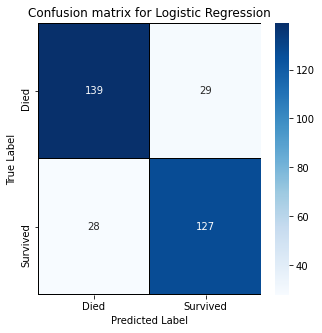

In [62]:
# Lets plot Confusion Matrix for Logistic Regression.
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ['Died','Survived']
y_axis_labels = ['Died','Survived']

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.2,linecolor='black',fmt='.0f',ax=ax,cmap='Blues',
           xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for Logistic Regression");

From the plot we can easily observe the predicted values and true values.

True-Positive = 139 False-Positive = 29 False-Negative = 28 True -Negative = 127

### Decision Tree Classifier

In [63]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)

print("The Accuracy Score is:",accuracy_score(y_test,predDTC))
print("The confusion matrix is:\n",confusion_matrix(y_test,predDTC))
print("Classification Report is:\n",classification_report(y_test,predDTC))

The Accuracy Score is: 0.8513931888544891
The confusion matrix is:
 [[144  24]
 [ 24 131]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       168
           1       0.85      0.85      0.85       155

    accuracy                           0.85       323
   macro avg       0.85      0.85      0.85       323
weighted avg       0.85      0.85      0.85       323



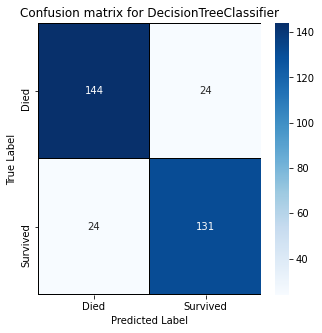

In [64]:
# Lets plot Confusion Matrix for DecisionTreeClassifier.
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ['Died','Survived']
y_axis_labels = ['Died','Survived']

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.2,linecolor='black',fmt='.0f',ax=ax,cmap='Blues',
           xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for DecisionTreeClassifier");

From the plot we can easily observe the predicted values and true values.

True-Positive = 144 False-Positive = 24 False-Negative = 24 True -Negative = 131

### Random Forest Classifier 

In [65]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)

print("The Accuracy Score is:",accuracy_score(y_test,predRFC))
print("The confusion matrix is:\n",confusion_matrix(y_test,predRFC))
print("Classification Report is:\n",classification_report(y_test,predRFC))

The Accuracy Score is: 0.8823529411764706
The confusion matrix is:
 [[155  13]
 [ 25 130]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       168
           1       0.91      0.84      0.87       155

    accuracy                           0.88       323
   macro avg       0.89      0.88      0.88       323
weighted avg       0.88      0.88      0.88       323



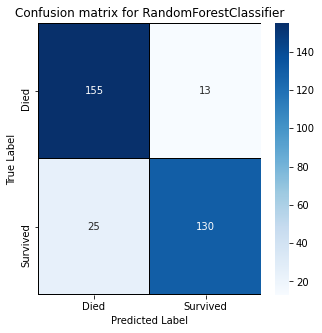

In [66]:
# Lets plot Confusion Matrix for RandomForestClassifier.
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ['Died','Survived']
y_axis_labels = ['Died','Survived']

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.2,linecolor='black',fmt='.0f',ax=ax,cmap='Blues',
           xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for RandomForestClassifier");

From the plot we can easily observe the predicted values and true values.

True-Positive = 155 False-Positive = 13 False-Negative = 25 True -Negative = 130

### Support Vector Machine Classifier 

In [67]:
SVC = SVC()
SVC.fit(x_train,y_train)
predSVC = SVC.predict(x_test)

print("The Accuracy Score is:",accuracy_score(y_test,predSVC))
print("The confusion matrix is:\n",confusion_matrix(y_test,predSVC))
print("Classification Report is:\n",classification_report(y_test,predSVC))

The Accuracy Score is: 0.8297213622291022
The confusion matrix is:
 [[149  19]
 [ 36 119]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.89      0.84       168
           1       0.86      0.77      0.81       155

    accuracy                           0.83       323
   macro avg       0.83      0.83      0.83       323
weighted avg       0.83      0.83      0.83       323



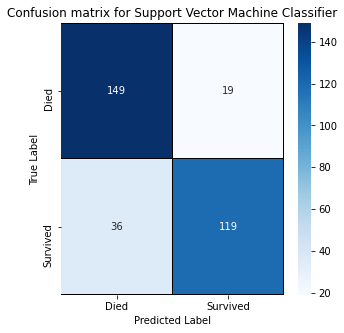

In [68]:
# Lets plot Confusion Matrix for Support Vector Machine Classifier.
cm = confusion_matrix(y_test,predSVC)

x_axis_labels = ['Died','Survived']
y_axis_labels = ['Died','Survived']

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.2,linecolor='black',fmt='.0f',ax=ax,cmap='Blues',
           xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for Support Vector Machine Classifier");

From the plot we can easily observe the predicted values and true values.

True-Positive = 149 False-Positive = 19 False-Negative = 36 True -Negative = 119

### KNearest Neighbor Classifier 

In [70]:
KNN = KNN()
KNN.fit(x_train,y_train)
predKNN = KNN.predict(x_test)

print("The Accuracy Score is:",accuracy_score(y_test,predKNN))
print("The confusion matrix is:\n",confusion_matrix(y_test,predKNN))
print("Classification Report is:\n",classification_report(y_test,predKNN))

The Accuracy Score is: 0.8297213622291022
The confusion matrix is:
 [[150  18]
 [ 37 118]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.80      0.89      0.85       168
           1       0.87      0.76      0.81       155

    accuracy                           0.83       323
   macro avg       0.83      0.83      0.83       323
weighted avg       0.83      0.83      0.83       323



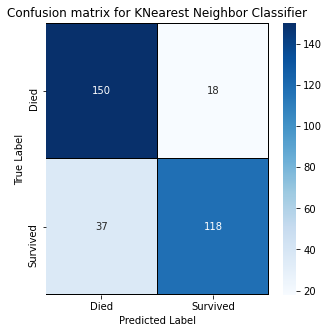

In [71]:
# Lets plot Confusion Matrix for KNearest Neighbor Classifier.
cm = confusion_matrix(y_test,predKNN)

x_axis_labels = ['Died','Survived']
y_axis_labels = ['Died','Survived']

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.2,linecolor='black',fmt='.0f',ax=ax,cmap='Blues',
           xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for KNearest Neighbor Classifier");

From the plot we can easily observe the predicted values and true values.

True-Positive = 150 False-Positive = 18 False-Negative = 37 True -Negative = 118

### Gradient Boosting Classifier 

In [73]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC = GBC.predict(x_test)

print("The Accuracy Score is:",accuracy_score(y_test,predGBC))
print("The confusion matrix is:\n",confusion_matrix(y_test,predGBC))
print("Classification Report is:\n",classification_report(y_test,predGBC))

The Accuracy Score is: 0.8823529411764706
The confusion matrix is:
 [[152  16]
 [ 22 133]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       168
           1       0.89      0.86      0.88       155

    accuracy                           0.88       323
   macro avg       0.88      0.88      0.88       323
weighted avg       0.88      0.88      0.88       323



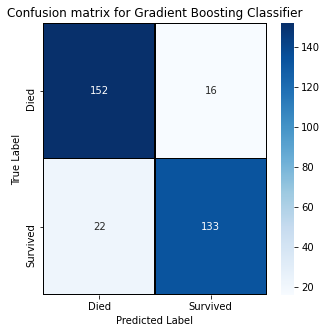

In [74]:
# Lets plot Confusion Matrix for Gradient Boosting Classifier.
cm = confusion_matrix(y_test,predGBC)

x_axis_labels = ['Died','Survived']
y_axis_labels = ['Died','Survived']

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.2,linecolor='black',fmt='.0f',ax=ax,cmap='Blues',
           xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for Gradient Boosting Classifier");

From the plot we can easily observe the predicted values and true values.

True-Positive = 152 False-Positive = 16 False-Negative = 22 True -Negative = 133

### Checking The Cross Validation Score 

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [77]:
# CV score for Logistic Regression.
print("The Cross validation score for Logistic Regression is:",cross_val_score(LR,x,y,cv=5).mean())

The Cross validation score for Logistic Regression is: 0.8054770702021301


In [78]:
# CV score for Decision Tree Classifier.
print("The Cross validation score for Decision Tree Classifier is:",cross_val_score(DTC,x,y,cv=5).mean())

The Cross validation score for Decision Tree Classifier is: 0.8092023473158008


In [79]:
# CV score for Random Forest Classifier.
print("The Cross validation score for Random Forest Classifier is:",cross_val_score(RFC,x,y,cv=5).mean())

The Cross validation score for Random Forest Classifier is: 0.8613171049771788


In [80]:
# CV score for Support Vector Machine Classifier.
print("The Cross validation score for Support Vector Machine Classifier is:",cross_val_score(SVC,x,y,cv=5).mean())

The Cross validation score for Support Vector Machine Classifier is: 0.8399304499021951


In [81]:
# CV score for KNearest Neighbor Classifier.
print("The Cross validation score for KNearest Neighbor Classifier is:",cross_val_score(KNN,x,y,cv=5).mean())

The Cross validation score for KNearest Neighbor Classifier is: 0.8157183221038904


In [82]:
# CV score for Gradient Boosting Classifier.
print("The Cross validation score for Gradient Boosting Classifier is:",cross_val_score(GBC,x,y,cv=5).mean())

The Cross validation score for Gradient Boosting Classifier is: 0.8538665507498371


From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model

### Hyper Parameter Tuning For Best Model 

In [84]:
# Random Forest Classifier
Parameters = {'n_estimators':[0,200],
              'criterion':['gini','entropy'],
             'max_depth':np.arange(0,50),
             'max_features':['auto','sqrt','log2'],
             'max_leaf_nodes':[10,20,30,40]}

In [85]:
GCV = GridSearchCV(RandomForestClassifier(),Parameters,cv=5)

In [86]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30, 40],
                         'n_estimators': [0, 200]})

In [87]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 22,
 'max_features': 'sqrt',
 'max_leaf_nodes': 20,
 'n_estimators': 200}

In [89]:
titanic = RandomForestClassifier(criterion='entropy',max_depth=22,max_features='sqrt',max_leaf_nodes=20,n_estimators=200)
titanic.fit(x_train,y_train)
pred = titanic.predict(x_test)
acc = accuracy_score(y_test,pred)
print("The Accuracy Score is:",acc*100)

The Accuracy Score is: 83.90092879256966


###  Plotting ROC and compare AUC for all the models used

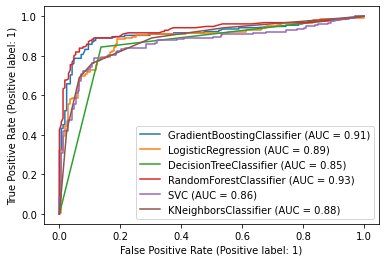

In [93]:
from sklearn.metrics import plot_roc_curve
 
disp = plot_roc_curve(GBC,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax = disp.ax_)
plot_roc_curve(DTC,x_test,y_test,ax= disp.ax_)
plot_roc_curve(RFC,x_test,y_test,ax = disp.ax_)
plot_roc_curve(SVC,x_test,y_test,ax = disp.ax_)
plot_roc_curve(KNN,x_test,y_test,ax = disp.ax_)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

### Ploting ROC-AUC Curve for Best Model 

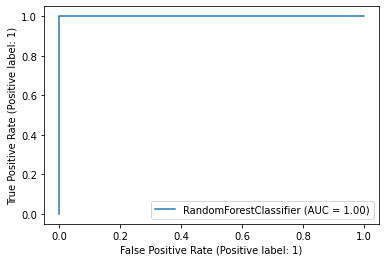

In [96]:
from sklearn import datasets
from sklearn import metrics
x,y = datasets.make_classification (random_state = 87)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=87)
df = RandomForestClassifier (random_state=87)
df.fit(x_train,y_train)
metrics.plot_roc_curve(df,x_test,y_test)
plt.show()

### Save the Model 

In [98]:
import joblib
joblib.dump(titanic,"Titanic.pkl")

['Titanic.pkl']